<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/%5BQuestion%5D_Exercise_Week_8_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Steivan Henry Octavian 0706022210038**


In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [97]:
# load dataset and show the first five sample
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [98]:
# rename the Annual Income (k$)	Spending Score (1-100) column
a = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}
data.rename(columns=a, inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
# describe data
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [100]:
# Check for null values in the dataset
a = data.isnull().sum()
print(a)


CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64


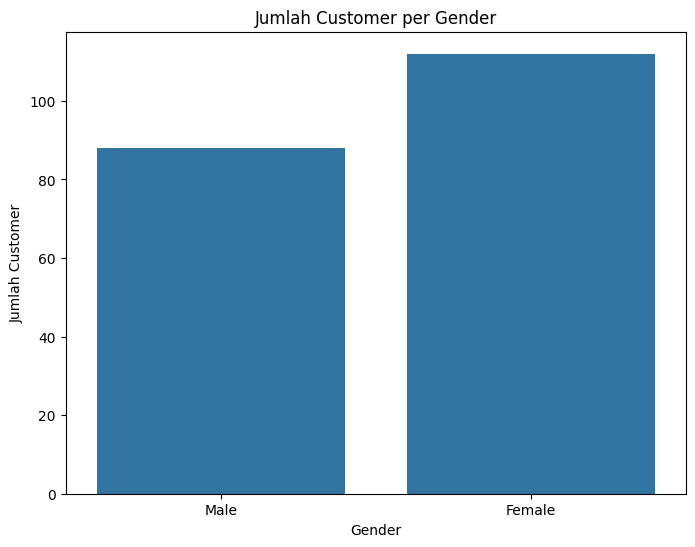

In [101]:
# make an insightful visualization and explain
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Jumlah Customer per Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Customer')
plt.show()

#Visualisasi ini bertujuan untuk memberikan gambaran tentang distribusi gender dalam data customer. Dengan melihat tinggi bar pada bar chart, kita dapat langsung membandingkan jumlah customer pria dan wanita.

In [102]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [103]:
# create new dataframe that consist only annual income and spending score
a = data[['Annual Income', 'Spending Score']]
a.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [104]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
a = pd.DataFrame(sc.fit_transform(a), columns=["Annual Income","Spending Score"])
a.head()


,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [105]:
# get stastical information on the new dataset
a.describe()

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

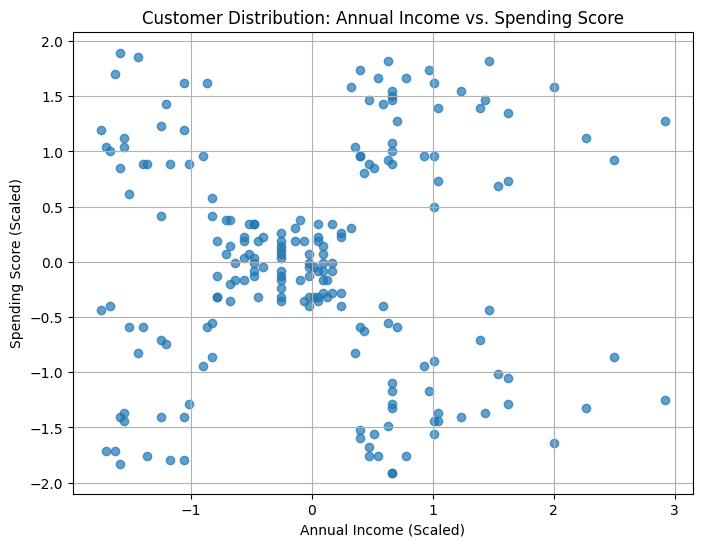

In [106]:
# Visualize the position
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(a['Annual Income'], a['Spending Score'], marker='o', alpha=0.7)
plt.title('Customer Distribution: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.grid(True)
plt.show()

#Visualisasi yang dihasilkan adalah scatter plot yang menunjukkan distribusi pelanggan berdasarkan Annual Income dan Spending Score.
# Setiap titik pada plot merepresentasikan seorang pelanggan.

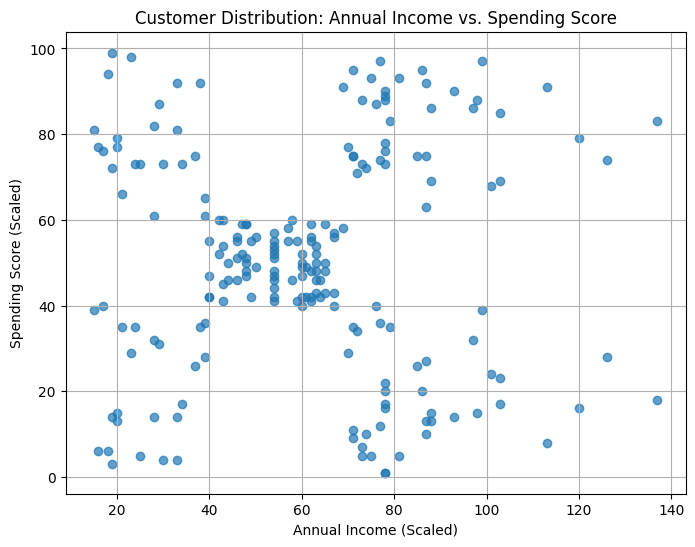

In [107]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(data['Annual Income'], data['Spending Score'], marker='o', alpha=0.7)
plt.title('Customer Distribution: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.grid(True)
plt.show()
# Visualisasi yang dihasilkan adalah scatter plot yang menunjukkan distribusi pelanggan berdasarkan Annual Income dan Spending Score.
# Setiap titik pada plot merepresentasikan seorang pelanggan.

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [108]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(a)
    sse.append(kmeans.inertia_)

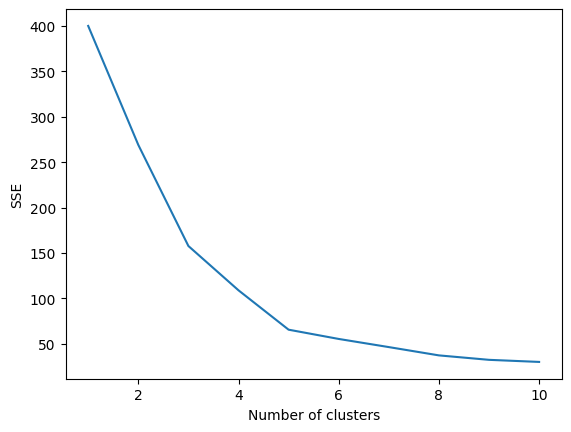

In [109]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# Visualisasi ini menjelskan sse atau kualitas pengelompokkannya sesuai dengan number cluster

In [110]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator (range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [111]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(a)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

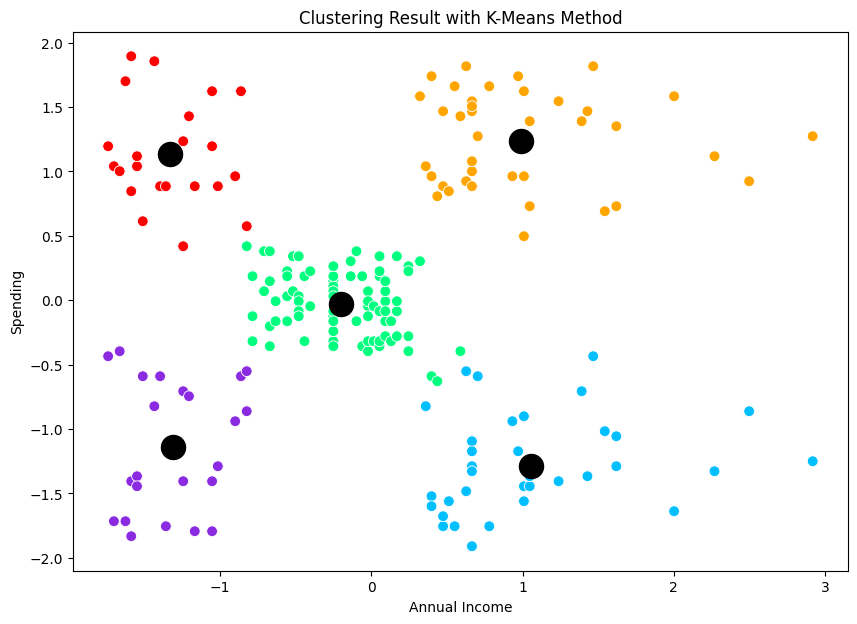

In [112]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
                legend=None, data = a, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

# Misalkan kita melihat cluster berwarna merah pada visualisasi.
# Jika cluster tersebut terletak di area dengan Annual Income tinggi dan Spending Score tinggi,
#kita dapat menginterpretasikan bahwa cluster tersebut merepresentasikan kelompok pelanggan "High Spenders".

In [113]:
# Inverse transform the scaled data to get the original values
a = pd.DataFrame(sc.inverse_transform(a), columns=["Annual Income","Spending Score"])
# Add the cluster labels to the original data
data ['Cluster'] = y_pred
# analyze the clusters with the original values
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [114]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = data.groupby(y_pred).agg({'Spending Score': ['mean', 'std', 'min', 'max'],
                                         'Annual Income': ['mean', 'std', 'min', 'max']})
cluster_summary = cluster_summary. rename_axis ('cluster')
cluster_summary
# Dari data tersebut,  Cluster 0 memiliki Spending Score dan Annual Income yang tinggi.
# Rata-rata Spending Score adalah 82.13, dan rata-rata Annual Income adalah 86.54.
# Rentang Spending Score berkisar antara 63 hingga 97, dan rentang Annual Income berkisar antara 69 hingga 137.

Spending Score                    Annual Income                    
                  mean        std min max          mean        std min  max
cluster                                                                    
0            20.913043  13.017167   3  40     26.304348   7.893811  15   39
1            79.363636  10.504174  61  99     25.727273   7.566731  15   39
2            17.114286   9.952154   1  39     88.200000  16.399067  70  137
3            82.128205   9.364489  63  97     86.538462  16.312485  69  137
4            49.518519   6.530909  34  61     55.296296   8.988109  39   76

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>